# Configurações inicias e leitura do arquivo

In [8]:
# importa o dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

history = []

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

nome_arquivo = './titanic.csv'
df=pd.read_csv(nome_arquivo) # Leitura do arquivo
df.head() # Visualização do arquivo

./exerc3.ipynb
./titanic.csv
./jupyter_local.ipynb
./exercicio1.ipynb
./lista4_aprendizado_maquina.pdf
./lista4_eng.pdf
./winequality.zip
./winequality/winequalityN.csv
./.ipynb_checkpoints/jupyter_local-checkpoint.ipynb
./.ipynb_checkpoints/exerc3-checkpoint.ipynb
./.ipynb_checkpoints/exercicio1-checkpoint.ipynb
./imagens/estrutura_ann.png
./imagens/arvore_entropia.png
./imagens/q2_3.png
./imagens/arvore_gini.png
./imagens/q1_1.png
./imagens/q1_2.png


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Tratamento dos dados

In [9]:
# Remove as linhas com dados vazios
from sklearn.preprocessing import LabelEncoder

print("Antes:", len(df.index) ,"linhas")

new_df = df
new_df = new_df.drop(['PassengerId','Name', 'Ticket','Cabin'] ,axis= 1)
le = LabelEncoder()
new_df['Sex'] = le.fit_transform(new_df['Sex'])
new_df['Embarked'] = le.fit_transform(new_df['Embarked'])
#     Y = new_df[['quality']]
new_df = new_df.dropna()
print("Depois:", len(new_df.index), "linhas")
new_df

Antes: 891 linhas
Depois: 714 linhas


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,0


# Treino

## Separação do dataset entre treino e teste

In [10]:
# Separa o dataset entre treino e teste
def dataset_split():
    # O atributo quality será utilizado como o verificador (r(valor_correto) - y(previsão))
    X= new_df.drop(["Survived"] ,axis= 1)
    Y = new_df[['Survived']]

    # Separa o dataset entre treino e teste. Sendo a proporção de 70% para o treino e 30% para o teste)
    X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.1, random_state = random.randint(0,1000))
    # print("Shape of X_train: ", X_train.shape)
    # print("Shape of y_train: ", Y_train.shape)
    # print("Shape of X_test: ", X_test.shape)
    # print("Shape of y_test: ", Y_test.shape)
    return (X_train, Y_train, X_test, Y_test)

In [11]:
# from sklearn.svm import SVC

# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# import random


# def calculate_svc(C, kernel, degree):
#   model = SVC(C=C, kernel=kernel, degree = degree)
#   model.fit(X_train, Y_train.values.ravel())
#   Y_pred = model.predict(X_test)
#   print("C:", C , "\t\tKernel:", kernel, "\t\tAccuracy:",accuracy_score(Y_test,Y_pred),"%")

# for i in range(1):
#   # C=100
#   # if(i!=0):
#   (X_train, Y_train, X_test, Y_test) = dataset_split()
#   # C= random.uniform(8000, 100000)
#   C = 1

#   calculate_svc(C=C, kernel = 'linear', degree = 1)
#   calculate_svc(C=C, kernel = 'poly', degree = 3)
#   calculate_svc(C=C, kernel = 'rbf', degree = 1)
#   calculate_svc(C=C, kernel = 'sigmoid', degree = 1)
#   print("--------------------------------------")
#   print("--------------------------------------\n")

# # A matriz precisa ser quadrada para usar precomputed
# # calculate_svc(C=1, kernel = 'precomputed', degree = 1)

## Resultados utilizando o código acima
O código está comentado para não atrapalhar a execução das outras partes.

Em testes separados sem utilizar o GridSearchCV:

Teste 1:
Parâmetros:
    C = 300
    Kernel: rbf
Resultado:
    Acurácia do treino de aproximadamente 82%.

Teste 2:
Parâmetros:
    C = 300
    Kernel: linear
Resultado:
    Acurácia do treino de aproximadamente 79%.

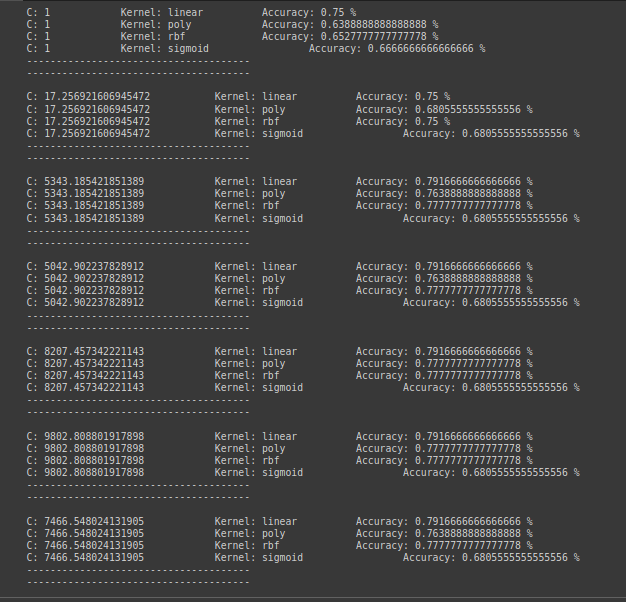

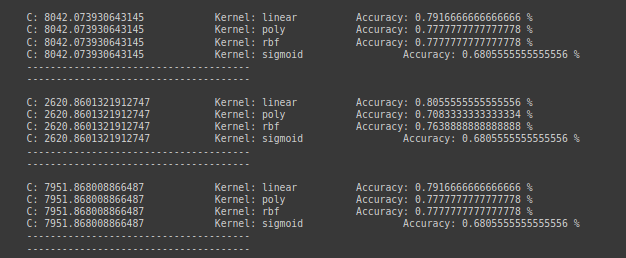

## Experimento com GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import random

c_list_1 = [50*x for x in range(1,3)]
c_list_2 = [x/10.0 for x in range(1,3)]
c_list_3 = [0.01, 5,10,15]
c_list = c_list_1 + c_list_2 +c_list_3
gamma_list = [x/100.0 for x in range (1,3)]
gamma_list.append(0.10)
gamma_list.append(1)
gamma_list.append('auto')
gamma_list.append('scale')

print("C_list=",c_list)
print("gamma_list=",gamma_list)

# A matriz precisa ser quadrada para usar precomputed
# calculate_svc(C=1, kernel = 'precomputed', degree = 1)

# Serão utilizadas várias combinadções dos parâmetros de grid para verificar
# qual a melhor estrutura.
test_parameters = {
    'C':c_list,
    'kernel' : ["linear","rbf","sigmoid"],
    #'degree' : [1,2],
    'gamma' : gamma_list
}

test_parameters2 = {
    'C':c_list,
    'kernel' : ["poly"],
    'degree' : [1,2,3,4,5,6,7],
    'gamma' : gamma_list
}

(X_train, Y_train, X_test, Y_test) = dataset_split()


C_list= [50, 100, 0.1, 0.2, 0.01, 5, 10, 15]
gamma_list= [0.01, 0.02, 0.1, 1, 'auto', 'scale']


### Impressão do resultado final
Foi realizada a divisão entre polinomial e os outros métodos porque o método polinomial possui um atributo único, chamado **degrees**. Nos outros métodos esse atributo é ignorado, assim essa divisão tenta acelerar a procura.

#### Polinomial

In [ ]:
svm = SVC()
svm_cv = GridSearchCV(svm, test_parameters2, n_jobs = -1)
svm_cv.fit(X_train,Y_train.values.ravel())

In [ ]:
poli_best_params = svm_cv.best_params_
poli_train_score = svm_cv.best_score_
poli_test_score =  svm_cv.score(X_test,Y_test)
print("Best parameters poli:", svm_cv.best_params_)
print("Train Score poli:",svm_cv.best_score_)
print("Test Score poli:", svm_cv.score(X_test,Y_test))

#### Outros métodos

In [ ]:
svm = SVC()
svm_cv = GridSearchCV(svm, test_parameters, n_jobs = -1)
svm_cv.fit(X_train,Y_train.values.ravel())

In [ ]:
other_best_params = svm_cv.best_params_
other_train_score = svm_cv.best_score_
other_test_score =  svm_cv.score(X_test,Y_test)

print("Best parameters others:", svm_cv.best_params_)
print("Train Score others:",svm_cv.best_score_)
print("Test Score others:", svm_cv.score(X_test,Y_test))

In [ ]:
if(poli_test_score > other_methods_score):
    print("Best parameters poli:", poli_best_params)
    print("Train Score poli:", poli_train_score)
    print("Test Score poli:", poli_test_score)
else:
    print("Best parameters for other methods:", other_best_params)
    print("Train Score:",other_train_score)
    print("Test Score:", other_test_score)

Resultado do GridSearchCv:
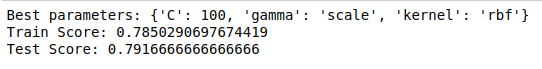
